# Самостоятельная работа № 1

### Задание 1

Модуль лингвистической предобработки текста является одним из важнейших компонентов современных TTS систем.
Стандартный набор преобразований над текстом включает в себя:
- нормализацию 
- токенизацию 
- построение транскрипции

Нормализация подразумевает расшифровку числовых последовательностей, дат, оббревиатур, иноязычных вставок, сокращений и т.д. (не путать с приведением к нормальной форме слов - принятой терминологиией в NLP).

Токенизация - разбиение текста на предложения и слова.

Построение транскрипции позволяет получить из графемного фонемное представление текста. На этом же этапе разрешается пробелма расстановки ударений. 

Предлагается построить простой пайплайн лингвистической предобработки: токенизация на предложения, нормализация каждого предложения, получение фонемной последовательности для каждого предложения.

### Инструкция по установке и подключению сторонних библиотек из репозиторией (если не устанавливается через pip)
1. Склонировать репозиторий 

*!git clone путь к репозиторию*

2. Добавить корень репо в PATH

*sys.path.append("корень склонированного репо")*

3. Установить необходимые зависимости для репо

*!pip install название библиотеки*

In [1]:
# утрановка необходимых библиотек

!pip install torch

In [2]:
# Импорт необходимых библиотек

import numpy as np
import os
import sys
import uuid
import torch

from google.colab import drive
from google.colab import files
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
# ваш номер
my_id = uuid.uuid4().hex
print(my_id)

9fe95404854f4e18a3cc8afd921e436f


In [4]:
# Исходный текст
input_text = "В 1785 г в городе Augsburg случилось странное проишествие. Группа в 18 человек, где каждый весил не менее 100 кг, устроила праздник на втором этаже деревянного здания."

In [5]:
# Используйте razdel отсюда https://github.com/natasha/razdel
!pip install git+https://github.com/natasha/razdel.git

  Cloning https://github.com/natasha/razdel.git to /tmp/pip-req-build-vz8tc5s9
  Running command git clone -q https://github.com/natasha/razdel.git /tmp/pip-req-build-vz8tc5s9
  Created wheel for razdel: filename=razdel-0.5.0-cp37-none-any.whl size=21249 sha256=36df65ea0b75ac4dbe4a1b74d87e603c21af9601f292859290931f3edc2f4397
  Stored in directory: /tmp/pip-ephem-wheel-cache-gyxx_u3e/wheels/7a/dd/b9/a1c90dca7aa3c7a609ba0a2809bbcb747e9ca1c1d54cc4def4
Successfully built razdel


In [7]:
from razdel import sentenize

def tokenize_by_sent(text):
   "Возвращает список токенизированных предложений"
   tokens = list(sentenize(text))
   return tokens
  #  pass

In [8]:
sentences = tokenize_by_sent(input_text)

In [33]:
print(sentences)

[Substring(0, 58, 'В 1785 г в городе Augsburg случилось странное проишествие.'), Substring(59, 167, 'Группа в 18 человек, где каждый весил не менее 100 кг, устроила праздник на втором этаже деревянного здания.')]


In [36]:
sentences[0].text

'В 1785 г в городе Augsburg случилось странное проишествие.'

Токенизация на предложения нужна и при подготовке обучающих баз и при инференсе системы. Обучать модель на длинных текстах как правило не целесообразно. 

Токенизация на слова может понадобится для получения границ слов, получения знаков препринания, может требоваться для более качественной нормализации.

In [11]:
!git clone https://github.com/snakers4/russian_stt_text_normalization

Cloning into 'russian_stt_text_normalization'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 48 (delta 23), reused 19 (delta 9), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [16]:
sys.path.append("russian_stt_text_normalization")

In [17]:
!pip install git+https://github.com/snakers4/russian_stt_text_normalization

  Cloning https://github.com/snakers4/russian_stt_text_normalization to /tmp/pip-req-build-n9f81220
  Running command git clone -q https://github.com/snakers4/russian_stt_text_normalization /tmp/pip-req-build-n9f81220
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [30]:
# import russian_stt_text_normalization.normalizer
os.chdir('/content/russian_stt_text_normalization')

In [31]:
# Для реализации функции воспользуйтесь инструментом Normalizer из этого репозитория https://github.com/snakers4/russian_stt_text_normalization
# подсказка по путям sys.path.append("russian_stt_text_normalization")

def normalize(text):
  "Возвращает нормализованное предложение"
  norm = Normalizer()
  result = norm.norm_text(text)
  return result
  # pass

In [34]:
norm_sentences = [normalize(sentence.text) for sentence in sentences]

100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


In [37]:
print(norm_sentences)

['В тысяча семьсот восемьдесят пятый год в городе огсбург случилось странное проишествие.', 'Группа в восемнадцать человек, где каждый весил не менее ста килограммов, устроила праздник на втором этаже деревянного здания.']


Нормализация текста - сложная задача. Далеко не всегда открытые решения хорошо с ней справляются. Нормализация на основе лингвистических баз и правил может справляться с задачей лучше, чем нейросетевая модель.

In [38]:
# Для реализации используйте Accentor отсюда https://github.com/nsu-ai/russian_g2p
# Для решения проблем с импортом в этой библиотеке лучше перенести папку russian_g2p ближе к корню
# os.rename("russian_g2p", "root_russian_g2p")
# os.replace("root_russian_g2p/russian_g2p", "russian_g2p")

In [41]:
os.chdir('/content')

In [42]:
!git clone https://github.com/nsu-ai/russian_g2p

Cloning into 'russian_g2p'...
remote: Enumerating objects: 878, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 878 (delta 6), reused 9 (delta 4), pack-reused 854
Receiving objects: 100% (878/878), 33.92 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (586/586), done.


In [45]:
os.rename("russian_g2p", "root_russian_g2p")
os.replace("root_russian_g2p/russian_g2p", "russian_g2p")

In [48]:
!pip install -r '/content/root_russian_g2p/requirements.txt'

  Cloning https://github.com/bond005/rnnmorph.git to /tmp/pip-req-build-4d26wt1f
  Running command git clone -q https://github.com/bond005/rnnmorph.git /tmp/pip-req-build-4d26wt1f
     |████████████████████████████████| 378kB 7.7MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 8.2MB 11.0MB/s 
  Created wheel for dawg: filename=DAWG-0.8.0-cp37-cp37m-linux_x86_64.whl size=855923 sha256=11acba3b93048280870a046b3647f81a0589143c37410e785949535207cd7365
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
  Created wheel for rnnmorph: filename=rnnmorph-0.4.0-cp37-none-any.whl size=10529959 sha256=38a3e5ade83e741b90cb283cbd70e04f62350e3520a647d76ba6b7bf8c82f851
  Stored in directory: /tmp/pip-ephem-wheel-cache-c82uwl3h/wheels/60/f3/e1/cc032402ccbf420e212766beba51cbd11d581fbd7cd1d9658a
  Created wheel for russian-tagsets: filename=russian_tagsets-0.6-cp37-none-any.whl size=24635 sha256=ffb9

In [51]:
from russian_g2p.Accentor import Accentor
from russian_g2p.Grapheme2Phoneme import Grapheme2Phoneme

In [91]:
def g2p(text):
  "Возвращает список из фонем входящего текста"
  my_accentor = Accentor()
  accents = my_accentor.do_accents([[word] for word in text.split()])
  res = []
  transcription = Grapheme2Phoneme()
  # my_transcription = transcription.phrase_to_phonemes(text)  
  # print(accents)  
  for item in accents[0]:
    res.extend(transcription.phrase_to_phonemes(item))
  return res #my_transcription
  # pass

In [92]:
phonemes_sequences = [g2p(sentence) for sentence in norm_sentences]

/content/russian_g2p/Accentor.py:559: UserWarning: Word `огсбург` is unknown!
  warnings.warn(err_msg)
/content/russian_g2p/Accentor.py:559: UserWarning: Word `проишествие.` is unknown!
  warnings.warn(err_msg)
/content/russian_g2p/Grapheme2Phoneme.py:96: UserWarning: `огсбург`: the accent for this word is unknown!
  warnings.warn(f'`{source_word}`: the accent for this word is unknown!')
/content/russian_g2p/Grapheme2Phoneme.py:96: UserWarning: `проишествие`: the accent for this word is unknown!
  warnings.warn(f'`{source_word}`: the accent for this word is unknown!')
/content/russian_g2p/Accentor.py:559: UserWarning: Word `человек,` is unknown!
  warnings.warn(err_msg)
/content/russian_g2p/Accentor.py:559: UserWarning: Word `килограммов,` is unknown!
  warnings.warn(err_msg)
/content/russian_g2p/Accentor.py:559: UserWarning: Word `здания.` is unknown!
  warnings.warn(err_msg)
/content/russian_g2p/Grapheme2Phoneme.py:96: UserWarning: `человек`: the accent for this word is unknown!
  wa

In [96]:
print(phonemes_sequences)

[['F', 'T', 'Y0', 'S0', 'I', 'TSH0', 'A', 'S0', 'I', 'M0', 'S', 'O0', 'T', 'V', 'O0', 'S0', 'I', 'M0', 'D0', 'I', 'S0', 'I', 'T', 'P0', 'A0', 'T', 'Y', 'J0', 'G', 'O0', 'T', 'F', 'G', 'O0', 'R', 'A', 'D0', 'I', 'A', 'G', 'Z', 'B', 'U', 'R', 'K', 'S', 'L', 'U', 'TSH0', 'I0', 'L', 'A', 'S0', 'S', 'T', 'R', 'A0', 'N', 'A', 'J0', 'I', 'P', 'R', 'A', 'I', 'SH', 'Y', 'S', 'T', 'V0', 'I', 'J0', 'I'], ['G', 'R', 'U0', 'P', 'A', 'F', 'V', 'A', 'S0', 'I', 'M', 'N', 'A0', 'TS', 'A', 'T0', 'TSH0', 'I', 'L', 'A', 'V0', 'I', 'K', 'G', 'D0', 'E0', 'K', 'A0', 'ZH', 'D', 'Y', 'J0', 'V0', 'E0', 'S0', 'I', 'L', 'N0', 'I', 'M0', 'E0', 'N0', 'I', 'J0', 'I', 'S', 'T', 'A0', 'K0', 'I', 'L', 'A', 'G', 'R', 'A', 'M', 'A', 'F', 'U', 'S', 'T', 'R', 'O0', 'I', 'L', 'A', 'P', 'R', 'A0', 'Z0', 'N0', 'I', 'K', 'N', 'A', 'F', 'T', 'A', 'R', 'O0', 'M', 'Y', 'T', 'A', 'ZH', 'E0', 'D0', 'I', 'R0', 'I', 'V0', 'A0', 'N', 'A', 'V', 'A', 'Z', 'D', 'A', 'N0', 'I', 'J0', 'A']]


In [98]:
# Сохраняем результат себе

with open(f"result_1_{my_id}.txt", 'w') as f_out:
  for sequence in phonemes_sequences:
    f_out.write(f'{" ".join(sequence)}\n')

In [99]:
files.download(f"result_1_{my_id}.txt") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Насколько можно видеть, итоговая последовательность может представлять из себя простой список из фонем, к котором не видно границ слов или знаков препинания.
В самом просто варианте, границы слов можно обозначить пробельным символом. Однако знаки препинания лучше исключить из финальной последовательности, т.к. их наличие будет мешать модели выстраивать матрицу внимания (какой длительности будет многоточие или знак вопроса?). 

### Задание 2

Пайплайн получения признаков из аудио для TTS может быть достаточно сложным.
Последовательность обработчиков и их параметры будут зависеть в том числе и от особенностей вокодера. 
Наиболее распространенным вариантом акустических признаков является логарифмированная мел-спектрограмма.

Задание - реализовать функции построения мел-спектрограммы с заданными параметрами.

Общий вид пайплайна такой: Входной сигнал -> Pre-emphasis -> STFT -> Магнитуда-> Мел-скейл -> Логарифмирование

In [100]:
# примонтировать свой диск (куда заранее положили нужный wav файл)
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [101]:
# загрузки входного сигнала (скорее всего путь будет таким 'gdrive/MyDrive/audio_sample/example.wav') 
# можно воспользоваться librosa
import librosa

def read_wave(wave_path):
  "возвращает волну и sample rate"
  wav = librosa.load(wave_path)
  return wav
  # pass

wave_path = "/content/gdrive/MyDrive/ColabNotebooks/example.wav"
wave, sr = read_wave(wave_path)

In [102]:
print(f"Sample rate = {sr}")
print(f"Wave max = {np.max(wave)} Wave min {np.min(wave)}")

Sample rate = 22050
Wave max = 0.4473876953125 Wave min -0.579498291015625


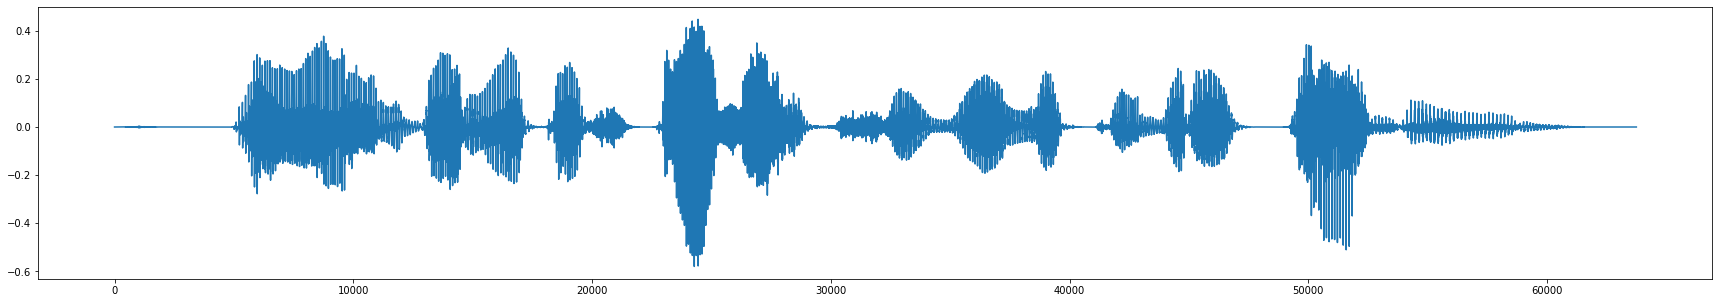

In [103]:
plt.figure(figsize=(30, 5))
plt.plot(wave)

Данные могут быть в формате float32 или int16 (обычно ...). Нужно привести к формату float32 в диапазоне значений [0, 1]. Стоит обратить внимание на максимальное и минимальное значение (если значения близки к максимум и минимуму диапазона, возможно они были нормализованы или даже клипированы). 

In [104]:
# Pre-emphasis
# y_t = x_t − α * x_t − 1
# α = 0.97

def preemphasis(x, coef=0.85):
  result = x - coef * x - 1
  return result
  # pass

preemh_wave = preemphasis(wave, 0.97)

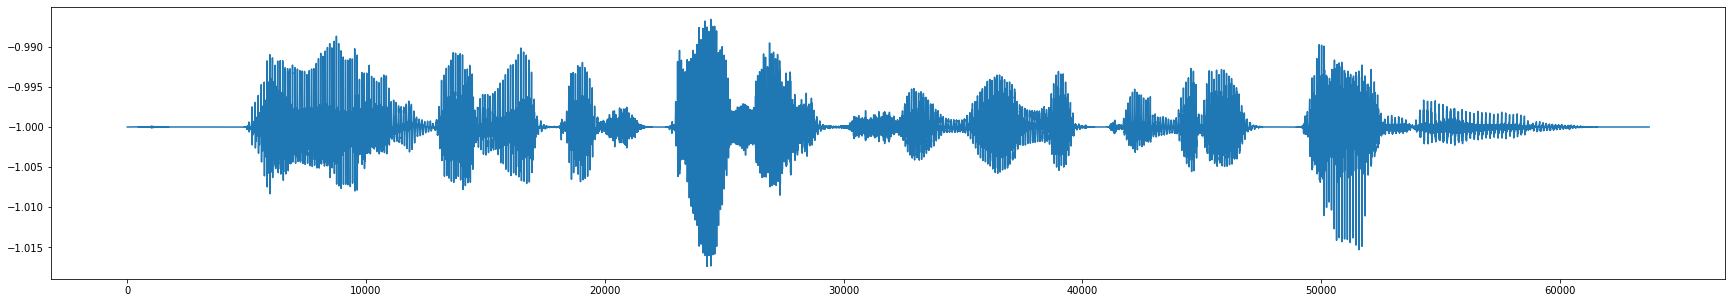

In [105]:
plt.figure(figsize=(30, 5))
plt.plot(preemh_wave )

Обратимое преобразование. Усиливает высокие частоты, ослабляет низкие. 

В вокодерах необходим для уменьшения высокочастотного шума при мю-кодировании.


In [106]:
# STFT (можно воспользоваться librosa)
# window = 1024, hop = 256, паддинг reflect, центрировать не надо, окно Ханна


def get_stft(data, n_fft, hop, window):
  result = librosa.stft(data, n_fft=n_fft, hop_length=hop, center=False, window=window)
  return result
  # pass

stft_features = get_stft(preemh_wave, 1024, 256, 'hann')

Short-time Fourier transform. Комплексные значения признаков. 

Окно анализа обычно соразмерно средней длине фонемы, шаг близким к средней длине коротких фонем (эвристические соображения от которых стоит отталкиваться).

In [107]:
# Магнитуда
# получить амплитудный спектр

def get_magnitude(features):
  magnitude, _ = librosa.magphase(features)
  return magnitude
  # pass

magnitude_features = get_magnitude(stft_features)

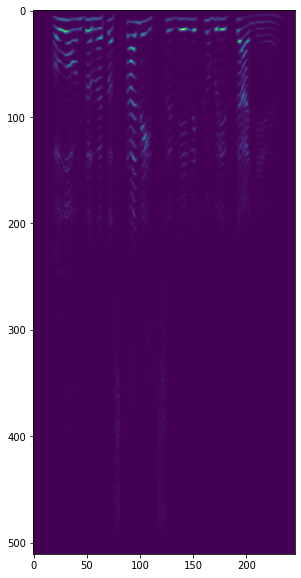

In [111]:
plt.figure(figsize=(10, 10))
plt.imshow(magnitude_features[2:])

Теряется информация о фазе (фазовые признаки значительно менее структурированы). Признаки все еще довольно большого размера. В некоторых моделях TTS применяются и такие.

In [113]:
# Мел-скейл. Реализуется в матричном виде как X_mel = Mel_basis * X, где Mel_basis 
# 100 бинов без ограничений частот (можно воспользоваться librosa.filters)

def get_mel_features(magnitude_features, mel_basis):
  result = mel_basis @ magnitude_features
  return result
  # pass

def get_mel_basis(sample_rate, size):
  result = librosa.filters.mel(sr=sample_rate, n_fft=1024, n_mels=size)
  return result
  # pass

mel_basis = get_mel_basis(sr, 100)
mel_features = get_mel_features(magnitude_features, mel_basis)

In [114]:
print(f"max {mel_features.max()} min {mel_features.min()} mean {mel_features.mean()}")

max 5.079141616821289 min 3.28687495587336e-17 mean 0.05156175419688225


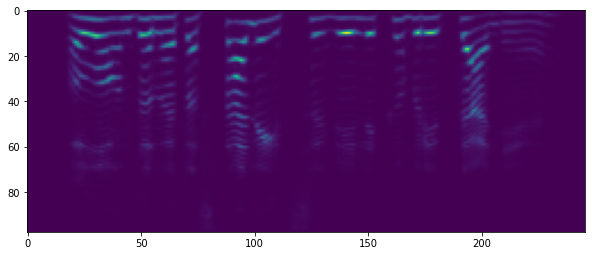

In [116]:
plt.figure(figsize=(10, 10))
plt.imshow(mel_features[2:])

Значительно уменьшается размер признаков, при этом практически не теряется воспринимаемое акустическое качество.

In [117]:
# Логарифмирование
# амплитуды лучше логарифмировать ln(x), 1e-5 установить минимальным значением под логарифмом (для вычислительной стабильности)
# 20log10(x) был бы перевод в децибелы, но разница в константе, поэтому можно не усложнять

def get_log_features(features):
  result = np.log(features + 10e-5)
  return result
  # pass

log_mel_features = get_log_features(mel_features)

In [118]:
print(f"max {log_mel_features.max()} min {log_mel_features.min()} mean {log_mel_features.mean()}")

max 1.6251620054244995 min -9.21034049987793 mean -8.018912315368652


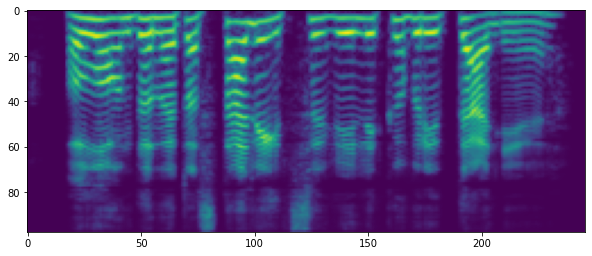

In [120]:
plt.figure(figsize=(10, 10))
plt.imshow(log_mel_features[2:])

Такие признаки уже можно нормализовать.

Совет - посмотрите, как будет выглядеть эти же признаки без pre-emphasis.

In [ ]:
# Выгрузим результат
np.save(f"log_mel_features_{my_id}.npy", log_mel_features)
files.download(f"log_mel_features_{my_id}.npy") 

### Задание 3

Механизм внимания позволяет модели отображать последовательность фонем на спектрограмму. Базовый вариант, предложенный в модели Tacotron 1, называется content based attention.

Этот простой механизм пришел в TTS из области машинного перевода и он не учитывает многих особенностей синтеза речи. В главном это монотонный и локальный характер внимания. 

Монотонность обеспечивается тем, что порядок звуков и фонем одинаковый (если одна фонема находится в порядке после другой, то и ее признаки в спектрограмме будут находится после признаков первой, в отличие от задачи машинного перевода, где порядок слов в разных языках может отличаться). 

Локальность обеспечивается тем, что фонемы влияют на звучание только своих ближайших соседей.

Не очень подходящий механзм внимания значительно влияет на качество и естественность речи. Непрерывные длинные участки речи с ним вообще крайне затруднительно синтезировать (внимание "ломается", "рассыпается", пропадают звуки, слова, речь заедает, звучит "белиберда", ломается голос, интонации).

Разработано уже много вариантов улучшения механизма внимания. А одни из лучших способов - сразу прогнозировать длительность фонем.

Попробуем на игрушечном примере построить один из рабочих вариантов механизма внимания FORWARD ATTENTION (https://arxiv.org/pdf/1807.06736.pdf). 

In [ ]:
import torch
import numpy as np

In [ ]:
seq_len = 100
enc_size = 32
attn_rnn_size = 16
dec_rnn_size = 16
attn_inner_size = 32
decoder_steps = 200 # у нас нет остановки, поэтому зададим заранее количество шагов декодера

In [ ]:
# загрузим заранее сгенерированный вектор
encoder_output = torch.from_numpy(np.load("gdrive/MyDrive/encoder_output.npy"))

In [ ]:
class Attention(torch.nn.Module):
  def __init__(self, query_size, key_size, attn_inner_size):
    super(Attention, self).__init__()
    self.softmax = torch.nn.Softmax(dim=0)
    self.query = torch.nn.Linear(query_size, attn_inner_size, bias=False)
    self.key = torch.nn.Linear(key_size, attn_inner_size, bias=False)
    self.v = torch.nn.Linear(attn_inner_size, 1, bias=False)

  def forward(self, queries, keys):
    keys = self.key(keys)
    queries = self.query(queries)
    attn = self.v(torch.tanh((queries + keys)).squeeze())
    attn = self.softmax(attn)
    return attn


class SimpleAttnDecoder(torch.nn.Module):
  def __init__(self, enc_size, attn_rnn_size, dec_rnn_size, attn_inner_size):
    super(SimpleAttnDecoder, self).__init__()
    self.attn_rnn_size = attn_rnn_size
    self.dec_rnn_size = dec_rnn_size
    self.enc_size = enc_size
    self.attention = Attention(attn_rnn_size, enc_size, attn_inner_size)
    self.rnn_attn = torch.nn.RNNCell(input_size=enc_size, hidden_size=attn_rnn_size)
    self.rnn_decoder = torch.nn.RNNCell(input_size=enc_size, hidden_size=dec_rnn_size)

  def forward(self, encoder_output, output_len):
    attention_matrix = []
    outputs = []
    attention_state = torch.zeros(1, self.attn_rnn_size).float()
    decoder_state = torch.zeros(1, self.dec_rnn_size).float()
    context = torch.zeros(1, self.enc_size).float()
    
    for idx in range(output_len):
      attention_state = self.rnn_attn(context, attention_state)
      attention_probs = self.attention(attention_state , encoder_output)
      # forward attention - это всего-лишь модификация attention_probs 
      # допишите класс SimpleAttnDecoder, чтобы в этом месте срабатывал forward attention 
      # Algorithm 1 из предложенной статьи без transition agent
      # . . . тут вставка forward attention
      context = torch.mm(encoder_output.squeeze().transpose(0,1), attention_probs).transpose(0,1)
      decoder_state = self.rnn_decoder(context, decoder_state)
      
      attention_matrix.append(attention_probs)
      outputs.append(decoder_state)
    
    attention_matrix = torch.stack(attention_matrix).transpose(0,1).squeeze()
    outputs = torch.stack(outputs).transpose(0,1).squeeze()
    return outputs, attention_matrix

In [ ]:
decoder = SimpleAttnDecoder(enc_size, attn_rnn_size, dec_rnn_size, attn_inner_size)
decoder.load_state_dict(torch.load("gdrive/MyDrive/decoder_state_dict.pt"))

In [ ]:
with torch.no_grad():
  outputs, attention_matrix = decoder(encoder_output, decoder_steps)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(attention_matrix.flip(0))

In [ ]:
# Выгрузим готовый результат (матрицу внимания с реализованным forward attention)
np.save(f"attention_{my_id}.npy", attention_matrix.flip(0).numpy())
files.download(f"attention_{my_id}.npy")

Матрица внимания будет значительно диагональнее (и это модель со случайным входом и случайными весами!)